Using:
    https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e
    https://forums.fast.ai/t/character-level-language-model/31379
    
Lesson 3 RNN


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode

In [12]:
df = pd.read_csv('/rds/user/trpb2/hpc-work/data/takeaway/OS Data June 2019.txt', sep="|", encoding='latin-1')

/home/trpb2/.conda/envs/fastai_v1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,14,15,16,22,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['UNIQUE_REFERENCE_NUMBER', 'NAME', 'POINTX_CLASSIFICATION_CODE',
       'FEATURE_EASTING', 'FEATURE_NORTHING', 'POSITIONAL_ACCURACY_CODE',
       'UPRN', 'TOPOGRAPHIC_TOID', 'TOPOGRAPHIC_TOID_VERSION', 'ITN_EASTING',
       'ITN_NORTHING', 'ITN_TOID', 'ITN_TOID_VERSION', 'DISTANCE',
       'ADDRESS_DETAIL', 'STREET_NAME', 'LOCALITY', 'GEOGRAPHIC_COUNTY',
       'POSTCODE', 'VERIFIED_ADDRESS', 'ADMINISTRATIVE_BOUNDARY',
       'TELEPHONE_NUMBER', 'URL', 'BRAND', 'QUALIFIER_TYPE', 'QUALIFIER_DATA',
       'PROVENANCE', 'DATE_OF_SUPPLY'],
      dtype='object')

In [13]:
takeaway = ['1020018', '1020019', '1020020']
df_take = df.loc[df['POINTX_CLASSIFICATION_CODE'].isin(takeaway)].copy()

In [14]:
df_take.head

<bound method NDFrame.head of          UNIQUE_REFERENCE_NUMBER                     NAME  \
1491124                 47967722         Sandwich Express   
1493179                 47967403               McDonald's   
1493409                 47967696            Sandwich Shop   
1493557                 47971419               McDonald's   
1493558                 47971430               McDonald's   
1493561                 47971907              Burger King   
1493562                 47971937               McDonald's   
1493563                 47972171          Minnie Bertha's   
1493569                 47972563               McDonald's   
1493570                 47972579              Burger King   
1493572                 47973740               McDonald's   
1493573                 47974815               McDonald's   
1493578                 47973069               McDonald's   
1493579                 47973189              Burger King   
1493580                 47974285               McDonald

In [14]:
df_take['NAME'] = np.where(~df_take['BRAND'].isnull(), df_take['BRAND'], df_take['NAME'])

In [15]:
df_take_trim = df_take[['NAME','POINTX_CLASSIFICATION_CODE']].copy()
df_take_trim2 = df_take_trim.drop_duplicates(['NAME','POINTX_CLASSIFICATION_CODE'])

In [21]:
df_take_trim2.to_json(path_or_buf='/rds/user/trpb2/hpc-work/data/takeaway/OS_Data_June_2019_take_names_trim.txt')
df_take_trim2.to_csv('/home/trpb2/data/takeaway/OS_Data_June_2019_take_names_trim.csv', index = False)

In [3]:
df_take_trim2 = pd.read_json(path_or_buf='/rds/user/trpb2/hpc-work/data/takeaway/OS_Data_June_2019_take_names.txt')

In [5]:
df_from_je = pd.read_csv('/home/trpb2/takeaways/after_21_11_2019_meeting_clean.csv')

In [10]:
df_from_je2 = df_from_je[['ascii_name_fix']].copy()
df_from_je3 = df_from_je2.rename(columns={"ascii_name_fix": "NAME"})

In [16]:
df_take_trim2 = df_take_trim[['NAME']].copy()

In [30]:
result = pd.concat([df_take_trim2, df_from_je3])

In [36]:
result2['NAME'] = result.NAME.str.lower().copy()

In [42]:
result3 = result2.reset_index()

In [44]:
result3

,index,NAME,ascii_name
0,1491124,sandwich express,sandwich express
1,1493179,mcdonald's,mcdonald's
2,1493409,sandwich shop,sandwich shop
3,1493557,mcdonald's,mcdonald's
4,1493558,mcdonald's,mcdonald's
5,1493561,burger king,burger king
6,1493562,mcdonald's,mcdonald's
7,1493563,minnie bertha's,minnie bertha's
8,1493569,mcdonald's,mcdonald's
9,1493570,burger king,burger king


In [47]:
result3['ascii_name'] = result3.NAME.apply(lambda x: unidecode(str(x)))

In [48]:
foreign_chars = Counter(_ for _ in ''.join(str(list(result3.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 215999),
 ("'", 159555),
 (',', 85418),
 ('"', 23272),
 ('&', 7428),
 ('-', 1499),
 ('2', 628),
 ('1', 585),
 ('.', 548),
 ('4', 317),
 ('3', 310),
 ('(', 303),
 (')', 303),
 ('@', 252),
 ('0', 230),
 ('8', 204),
 ('9', 180),
 ('5', 161),
 ('7', 150),
 ('6', 149),
 ('\\', 123),
 ('!', 62),
 ('+', 9),
 ('#', 9),
 (':', 8),
 ('?', 5),
 ('[', 1),
 ('/', 1),
 (']', 1)]

In [49]:
result3['ascii_name_fix'] = result3.ascii_name.str.replace('`',"'")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('~'," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace(']'," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('['," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('\\'," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('%'," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('*'," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace(':'," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('+'," and ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('/'," ")
result3['ascii_name_fix'] = result3.ascii_name_fix.str.replace('?'," ")

In [50]:
results_final = result3.drop_duplicates(['ascii_name_fix'])

In [52]:
results_final = results_final['ascii_name_fix']

In [53]:
results_final

0                                         sandwich express
1                                               mcdonald's
2                                            sandwich shop
5                                              burger king
7                                          minnie bertha's
17                                            oriental wok
18                                              pizza roma
19                                              moti jheel
20                                     moorlands fast food
21                                                 stavros
22                                              pizza spot
23                                      friendlies chinese
24                                                food net
25                                              pizza plus
26                                            pick a pizza
27                                                  fareed
28                                                 chutn

In [54]:
results_final.to_csv('/home/trpb2/data/takeaway/OS_names_plus_just_eat.csv', header=True, index = False)

/home/trpb2/.conda/envs/fastai_v1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [3]:
results_final = pd.read_csv('/home/trpb2/data/takeaway/OS_names_plus_just_eat.csv')

In [4]:
msk = np.random.rand(len(results_final)) < 0.8
train_df = results_final[msk]
valid_df = results_final[~msk]

In [5]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [6]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [7]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [8]:
data = TextLMDataBunch.from_df(path='.', train_df=train_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols=0, mark_fields=False, bs=512)

In [9]:
data.show_batch()

idx,text
0,k xxbos p i z z a r o m a xxbos m o t i j h e e l xxbos m o o r l a n d s f a s t f o o d xxbos s t a v r o s xxbos p i z z
1,h b a r xxbos a d e e l s b a l t i & p i z z a xxbos l u n g w a h xxbos c h a t t a n o o j a xxbos c h o p s
2,l e y ' s r o l l s xxbos s u l l i v a n s xxbos p y e g r e e n f i s h b a r xxbos b r o a d w a y f i s h b a r
3,h i n e s e t a k e a w a y xxbos n e w s u n r i s e xxbos h a r m o n y xxbos r i s i n g s u n c h i n e s e t a
4,n t a k e a w a y xxbos m i l b u r n c h i p p y xxbos o r i e n t a l v i l l a xxbos m o o r l a n d h o u s e xxbos m a


In [22]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.8)

In [23]:
learn.freeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


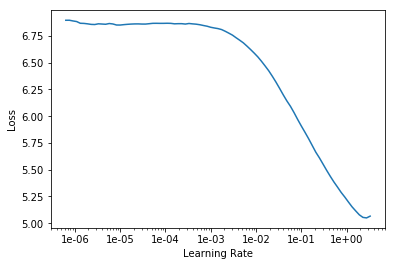

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.926732,3.089041,0.170392,00:10
1,3.710668,2.267664,0.345857,00:10
2,3.108984,2.084846,0.389834,00:10
3,2.767310,2.014898,0.411147,00:10
4,2.558785,1.964776,0.429590,00:10
5,2.419836,1.935380,0.442880,00:10
6,2.327745,1.918810,0.444108,00:10
7,2.292545,1.917328,0.443308,00:10
8,2.245696,1.908890,0.445257,00:10
9,2.222113,1.906836,0.445206,00:10


In [27]:
learn.freeze_to(-2)

In [28]:
learn.fit_one_cycle(10, slice(5e-2/(2.6**4),5e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.083999,1.835821,0.466336,00:11
1,2.024055,1.736687,0.483152,00:11
2,1.937924,2.098396,0.427520,00:11
3,1.873400,1.548384,0.539058,00:11
4,1.756422,1.473456,0.557138,00:11
5,1.678428,1.450083,0.566899,00:11
6,1.641758,1.433446,0.570141,00:11
7,1.598154,1.412820,0.575567,00:11
8,1.567625,1.403237,0.577148,00:11
9,1.532828,1.402605,0.578046,00:11


In [29]:
learn.freeze_to(-3)
learn.fit_one_cycle(10, slice(1e-3 / (2.6 ** 4), 1e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.495262,1.402025,0.577795,00:13
1,1.484210,1.399748,0.577869,00:13
2,1.478158,1.398034,0.579074,00:13
3,1.463766,1.394455,0.579729,00:13
4,1.463000,1.391147,0.580771,00:13
5,1.463352,1.389405,0.581231,00:13
6,1.470345,1.389417,0.580948,00:13
7,1.463903,1.388530,0.581585,00:13
8,1.456072,1.387736,0.581780,00:13
9,1.450331,1.388022,0.581683,00:13


In [30]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(5e-4 / (2.6 ** 4), 5e-4), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.467611,1.387640,0.581738,00:14
1,1.452530,1.386834,0.581594,00:14
2,1.460301,1.387493,0.582143,00:14
3,1.454064,1.385614,0.582129,00:14
4,1.443718,1.383542,0.582817,00:14
5,1.439152,1.382393,0.583380,00:14
6,1.439644,1.381771,0.583333,00:14
7,1.439700,1.381451,0.583422,00:14
8,1.436218,1.381060,0.583612,00:14
9,1.437603,1.380981,0.583482,00:14


In [31]:
learn.save_encoder('OS_JE_enc')

In [32]:
TEXT = "curry"
N_WORDS = 100
N_SENTENCES = 50

In [33]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

curry xxbos   b o w l d   b i t e s xxbos   s p o p e r   s t r e e t   c h i n e s e   t a k e a w a y xxbos   b u r g e r   h o u s e xxbos   p e p p e r   c h i n e s e   t a k e a w a y xxbos   o r i e n t a l   c h i c k
curry   h o ' s xxbos   d e s s e r t s i d e n   s p i c e xxbos   a s h a   c h i c k e n   &   k e b a b s xxbos   b e l l o n   f i s h   &   c h i p s xxbos   m a r i z a   k e b a b xxbos   f r e n ' s   c h i c k e n xxbos
curry   h o u s e   f o o d   s t o p xxbos   j i m m y ' s   -   w o k xxbos   y u m m y   l a m e xxbos   m a s s e e   p i z z a   h o u s e xxbos   s t r e e t   p i z z a   l t d xxbos   d e l i c i o u s   p i z z a   &
curry   v i l l a g e xxbos   s u m b e r   f i s h   b a r xxbos   s e a f e l l a n   s q u a r i o u s xxbos   f r e s h   h o u s e xxbos   c h i c k o ' s xxbos   t h e   f o r t u n e   r o a d   c h i c k e n   &   p i
curry u m   s h a c k xxbos   k h u n g   l a   m e a c t i o n xxbos   t h e   p i z z a   

In [29]:
learn.save('fine_tuned_take')

In [30]:
learn.save_encoder('fine_tuned_take_enc')

In [7]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv('/home/trpb2/data/takeaway/', 'just_eat_cleaned2.csv',
                         tokenizer=tokenizer, vocab=vocab, bs=256)

In [9]:
data_clas.show_batch()

text,target
g i l l s g o l d e n f i s h a n d c h i p s p i z z a k e b a b s a n d b u r g e r s,Fish and Chips
t u r k i s h k e b a b a n d m e d f i s h b a r a n d f r e s h f r i e d c h i c k e n,Fish and Chips
a p h r o d i t e xxunk s g r e e k m e d i t e r r a n e a n c u i s i n e a n d p i z z e r i a,Other
f l a v a z a u t h e n t i c c a r i b b e a n f o o d a n d e n g l i s h t a k e a w a y,Caribbean
g o l d e n g r i l l k e b a b p i z z a b u r g e r a n d f r i e d c h i c k e n,Kebab


In [27]:
# learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
# learn.load_encoder('fine_tuned_take_enc')
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, bptt=50)
learn.load_encoder('fine_tuned_take_enc')

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


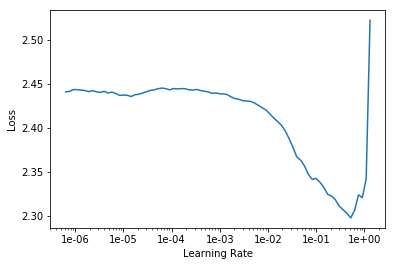

In [12]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(10, 5e-2, moms=(0.5,0.4))

epoch,train_loss,valid_loss,accuracy,time
0,2.033266,1.978429,0.274371,00:06
1,1.957308,2.079816,0.201296,00:06
2,1.965033,9.310196,0.193913,00:06
3,1.946947,1.944648,0.328914,00:06
4,1.943859,1.955984,0.285671,00:06
5,1.924727,1.903552,0.309929,00:07
6,1.892666,1.902773,0.294410,00:06
7,1.883779,1.849321,0.323942,00:06
8,1.884781,1.840299,0.330571,00:07
9,1.872872,1.794678,0.346994,00:06


In [29]:
learn.unfreeze()

In [30]:
learn.fit_one_cycle(10, 1e-2, moms=(0.5,0.4))

epoch,train_loss,valid_loss,accuracy,time
0,1.552507,1.683985,0.402742,00:14
1,1.291243,1.401439,0.562754,00:14
2,1.040915,0.932039,0.711014,00:14
3,0.941179,0.859158,0.731656,00:14
4,0.860922,0.805140,0.753352,00:14
5,0.766161,0.766477,0.765858,00:15
6,0.715259,0.748877,0.774296,00:15
7,0.649111,0.742894,0.780322,00:14
8,0.561426,0.756736,0.783486,00:14
9,0.534041,0.770164,0.782281,00:15


In [16]:
learn.fit_one_cycle(10, 1e-2, moms=(0.2,0.1))

epoch,train_loss,valid_loss,accuracy,time
0,0.525214,0.786186,0.777158,00:13
1,0.595883,0.792686,0.767666,00:14
2,0.698043,0.796735,0.756366,00:14
3,0.738910,0.786103,0.761941,00:13
4,0.723324,0.771238,0.770981,00:13
5,0.667660,0.750403,0.775953,00:13
6,0.636762,0.745331,0.781076,00:13
7,0.579327,0.752154,0.779117,00:14
8,0.507280,0.770408,0.778665,00:14
9,0.476563,0.780124,0.777610,00:14


In [25]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.404347,0.829010,0.765477,00:06
1,0.469652,0.843588,0.753410,00:07
2,0.566915,0.768581,0.775184,00:07
3,0.615458,0.779243,0.767051,00:07
4,0.623698,0.744845,0.772036,00:07
5,0.585304,0.777912,0.770986,00:07
6,0.537861,0.788623,0.775446,00:07
7,0.476540,0.804572,0.775971,00:07
8,0.418001,0.820105,0.775184,00:07
9,0.381202,0.829351,0.773610,00:06


In [26]:
learn

RNNLearner(data=TextClasDataBunch;

Train: LabelList (15243 items)
x: TextList
xxbos   h o n g   k o n g   t a k e a w a y,xxbos   g u r u   e x p r e s s,xxbos   l o t u s   c h i n e s e   t a k e a w a y,xxbos   c a k e a w a y   c e n t r a l   xxunk m a n c h e s t e r xxunk,xxbos   r o y a l   c h i c k e n   xxunk   p i z z a
y: CategoryList
Chinese,Indian,Chinese,Other,Chicken
Path: /home/trpb2/data/takeaway;

Valid: LabelList (3812 items)
x: TextList
xxbos   d i x y   c h i c k e n,xxbos   h o   l o k,xxbos   n e w   c h i n a   c h i n a,xxbos   c h i c k e n   c o t t a g e,xxbos   s p i c y   c h i c k e n
y: CategoryList
Chicken,Chinese,Chinese,Chicken,Chicken
Path: /home/trpb2/data/takeaway;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(41, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(41, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
 

In [37]:
learn.predict("ali")

(Category Indian,
 tensor(6),
 tensor([8.0158e-04, 1.8279e-04, 5.8076e-04, 3.0603e-05, 9.5918e-05, 1.8817e-04,
         9.2339e-01, 3.6895e-03, 2.4361e-02, 4.6622e-02, 5.7291e-05]))

In [44]:
learn.predict("fryer tuck")

(Category Fish and Chips,
 tensor(5),
 tensor([1.1382e-05, 9.5719e-05, 1.6008e-02, 6.0632e-03, 3.0964e-05, 9.3017e-01,
         1.4206e-03, 1.6480e-02, 6.8484e-03, 2.2800e-02, 7.6557e-05]))

In [42]:
learn.predict("pearl palace")

(Category Chinese,
 tensor(3),
 tensor([1.0408e-03, 5.1812e-04, 1.0170e-03, 9.6278e-01, 1.0142e-04, 2.7278e-03,
         3.7014e-03, 2.5880e-03, 1.8495e-02, 6.9538e-03, 8.1716e-05]))

In [33]:
learn.predict("jerk garden")

(Category Caribbean,
 tensor(1),
 tensor([9.7220e-04, 9.9858e-01, 1.9238e-04, 1.4910e-04, 1.7470e-06, 3.8351e-06,
         6.1090e-06, 2.9083e-05, 5.4969e-05, 1.5093e-05, 2.7300e-07]))

In [34]:
learn.predict("Abra Kebabra")

(Category Kebab,
 tensor(7),
 tensor([3.0558e-04, 1.4752e-03, 3.1265e-02, 5.0444e-04, 1.3333e-04, 1.3231e-02,
         4.7676e-02, 6.3788e-01, 1.0381e-01, 1.6361e-01, 1.0812e-04]))

In [35]:
learn.predict("McDoner")

(Category Chinese,
 tensor(3),
 tensor([0.0023, 0.0043, 0.0465, 0.3569, 0.0012, 0.0662, 0.0334, 0.2479, 0.0850,
         0.1508, 0.0056]))

In [21]:
df

,label,text
0,Chinese,hercynian lodge
1,Indian,curry master
2,Pizza,al mobeens
3,Indian,the prince of india
4,Other,mango bean
5,Chicken,hot rocks - flame grill
6,Pizza,crown pizza
7,Pizza,saddlers
8,Pizza,fireaway pizza
9,Kebab,gunes restaurant


In [26]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [27]:
df1 = df[df.isna().any(axis=1)]

In [28]:
df1

,label,text
